---

### Experiment 6

**Name:** Ankit Kumar  
**Roll Number:** 0901AM231011  
**Branch:** AIML  
**Semester:** 6  
**Subject:** Image Processing Lab  

**Experiment Number:** 6  
**Experiment Title:** Histogram Equalization .   

---


### Theory

The histogram of a digital image with gray levels in the range \([0, L-1]\) is a discrete function defined as:

\[
h(r_k) = n_k
\]

where \( r_k \) is the k-th gray level and \( n_k \) is the number of pixels having that gray level.

There are three typical cases of image histograms:
1. Dark images have histogram components concentrated on the lower gray levels.
2. Bright images have histogram components concentrated on higher gray levels.
3. Low contrast images have histogram components clustered in the middle gray levels.

Histogram equalization is a technique used to redistribute the gray levels of an image so that the histogram becomes approximately uniform. This enhances image contrast.

The transformation function used for histogram equalization is:

\[
S_k = \sum_{i=0}^{k} \frac{h(r_i)}{n}
\]

where \( n \) is the total number of pixels in the image.

Histogram equalization improves the overall contrast of an image by spreading the most frequent intensity values.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<BarContainer object of 256 artists>

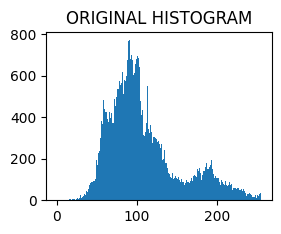

In [7]:
img = cv2.imread("bird.jpeg", cv2.IMREAD_GRAYSCALE)
img = np.array(img)
flat = img.flatten()

hist = np.bincount(flat, minlength=256)

plt.subplot(2, 2, 1)
plt.title("ORIGINAL HISTOGRAM")
plt.bar(range(256), hist, width=1)

In [8]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1
    return histogram

hist = get_histogram(flat, 256)

In [12]:
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

cs = cumsum(hist)
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
cs_normalized = nj / N

img_new = cs_normalized[flat]


<BarContainer object of 256 artists>

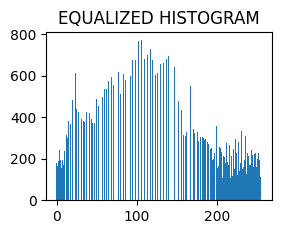

In [14]:
hist_eq = np.bincount(img_new.astype(np.uint8).flatten(), minlength=256)

plt.subplot(2, 2, 2)
plt.title("EQUALIZED HISTOGRAM")
plt.bar(range(256), hist_eq, width=1)

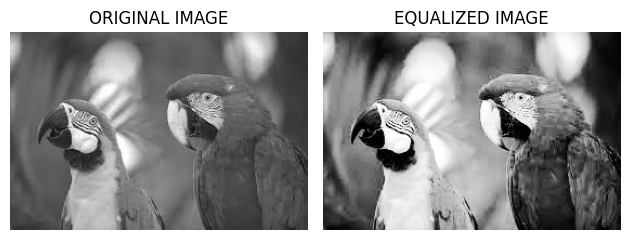

In [16]:
img_new = np.reshape(img_new, img.shape)

plt.subplot(2, 2, 3)
plt.title("ORIGINAL IMAGE")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("EQUALIZED IMAGE")
plt.imshow(img_new, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## Conclusion & Result

- Histogram equalization was successfully implemented to enhance the contrast of the image.
- The experiment demonstrates how redistributing gray levels improves visibility in low-contrast images.
- The original and equalized images along with their histograms were obtained as expected.